## Advanced Python Activity

In [1]:
# We import the necessary libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hostnames = []
dataset = []
df = None

In [3]:
# We create functions to generate hostnames with the requested instructions:

def set_hostnames(number_of_host: int) -> None:
    hostname_os = ['L']*4 + ['S']*3 + ['A']*2 + ['H']*1
    hostname_entorno = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30
    hostname_pais = ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30
    hostnames_alpha = []
    
    for i in range (number_of_host):
        pais = random.choice(hostname_pais)
        hostname = random.choice(hostname_os) + random.choice(hostname_entorno)
        hostname += pais
        hostnames_alpha.append(hostname)
        hostname += str (hostnames_alpha.count(hostname)).zfill(3)
        hostnames.append(hostname)

In [4]:
def get_os(hostname: str) -> str:
    if hostname [0] == 'L':
        return 'Linux'
    elif hostname [0] == 'S':
        return 'Solaris'
    elif hostname [0] =='A':
        return 'AIX'
    elif hostname [0] == 'H':
        return 'HP-UX'
    else:
        return 'Unknow'

In [5]:
def get_enviroment(hostname: str) -> str:
    if hostname [1] == 'D':
        return 'Development'
    elif hostname [1] == 'I':
        return 'Integration'
    elif hostname [1] == 'T':
        return 'Testing'
    elif hostname [1] == 'S':
        return 'Staging'
    elif hostname [1] == 'P':
        return 'Production'
    else:
        return 'Unknow'

In [6]:
def get_country (hostname: str) -> str:
    if hostname [2:5] == 'NOR':
        return 'Norway'
    elif hostname [2:5] == 'DEU':
        return 'Germany'
    elif hostname [2:5] == 'ITA':
        return 'Italy'
    elif hostname [2:5] == 'ESP':
        return 'Spain'
    elif hostname [2:5] == 'IRL':
        return 'Ireland'
    elif hostname [2:5] == 'FRA':
        return 'France'
    else:
        return 'Unknow'

In [7]:
def set_dataframe(count: int) -> None:
    global df
    
    set_hostnames(count)
    
    for hostname in hostnames:
        dataset.append({
            'Hostname' : hostname,
            'os' : get_os(hostname),
            'enviroment' : get_enviroment(hostname),
            'country' : get_country(hostname),
            'node': int(hostname[-3:])
        })
    df = pd.DataFrame(dataset)


In [8]:
set_dataframe(1500)

In [9]:
df

,Hostname,os,enviroment,country,node
0,ATITA001,AIX,Testing,Italy,1
1,ASFRA001,AIX,Staging,France,1
2,ASFRA002,AIX,Staging,France,2
3,LIIRL001,Linux,Integration,Ireland,1
4,LPESP001,Linux,Production,Spain,1
...,...,...,...,...,...
1495,LSNOR015,Linux,Staging,Norway,15
1496,LPIRL038,Linux,Production,Ireland,38
1497,LPDEU031,Linux,Production,Germany,31
1498,SIITA006,Solaris,Integration,Italy,6


In [10]:
# We save the df in a CSV document. This will be saved in the working directory. 

df.to_csv('hosts.csv', header=True, index=False)

In [11]:
# We display the CSV document with our df.

hosts_df = pd.read_csv('hosts.csv')
hosts_df

,Hostname,os,enviroment,country,node
0,ATITA001,AIX,Testing,Italy,1
1,ASFRA001,AIX,Staging,France,1
2,ASFRA002,AIX,Staging,France,2
3,LIIRL001,Linux,Integration,Ireland,1
4,LPESP001,Linux,Production,Spain,1
...,...,...,...,...,...
1495,LSNOR015,Linux,Staging,Norway,15
1496,LPIRL038,Linux,Production,Ireland,38
1497,LPDEU031,Linux,Production,Germany,31
1498,SIITA006,Solaris,Integration,Italy,6


In [12]:
# We create a new variable with our df to avoid modifying hosts_df:

var_hosts = hosts_df

# We group the countries by environments and display the result.

grafico_ec= var_hosts.groupby(['country','enviroment']).size()
grafico_ec

country  enviroment 
France   Development     16
         Integration     14
         Production      40
         Staging         35
         Testing         31
Germany  Development     50
         Integration     39
         Production     102
         Staging         75
         Testing         80
Ireland  Development     54
         Integration     49
         Production     117
         Staging         99
         Testing        124
Italy    Development     31
         Integration     15
         Production      59
         Staging         64
         Testing         64
Norway   Development      7
         Integration      4
         Production      35
         Staging         27
         Testing         25
Spain    Development     29
         Integration     28
         Production      73
         Staging         56
         Testing         58
dtype: int64

In [13]:
# We organize the grouping 'grafico_ec' using the unstack function and display the result:
grafico_ec_org = grafico_ec.unstack()  
grafico_ec_org

enviroment,Development,Integration,Production,Staging,Testing
country,,,,,
France,16,14,40,35,31
Germany,50,39,102,75,80
Ireland,54,49,117,99,124
Italy,31,15,59,64,64
Norway,7,4,35,27,25
Spain,29,28,73,56,58


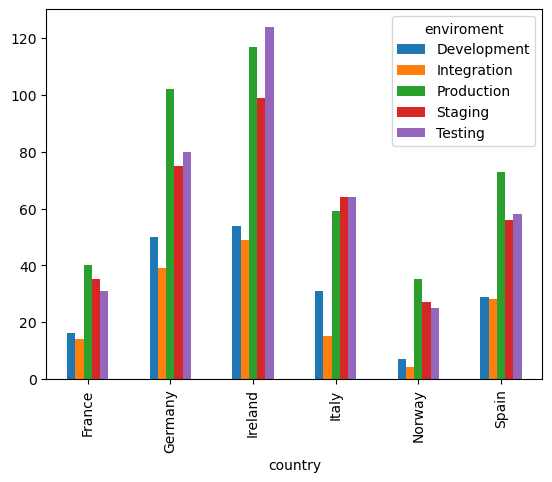

In [14]:
# We generate the graphs
grafico_ec_org.plot(kind='bar')
plt.show()

In [ ]:
# Data groupings needed for graphing:

# GRAPH 1: Grouping of operating systems by country and display the data

grafico_co = var_hosts.groupby(['country','os']).size()
grafico_co_org = grafico_co.unstack()
grafico_co_org


os,AIX,HP-UX,Linux,Solaris
country,,,,
France,25,20,56,35
Germany,75,36,129,106
Ireland,81,41,177,144
Italy,40,28,102,63
Norway,14,11,41,32
Spain,39,24,109,72


In [ ]:
# GRAPH 2: Total number of operating systems

grafico_os_total = var_hosts.groupby(['os']).size()
grafico_os_total


os
AIX        274
HP-UX      160
Linux      614
Solaris    452
dtype: int64

In [ ]:
# GRAPH 3: Total number of hosts by country

grafico_hc= var_hosts['country'].value_counts()
grafico_hc

country
Ireland    443
Germany    346
Spain      244
Italy      233
France     136
Norway      98
Name: count, dtype: int64

In [ ]:
# GRAPH 4: Number of hosts by country and environment, organized with unstack(0)

grafico_hosts_ec= grafico_ec.unstack(0) 
grafico_hosts_ec

country,France,Germany,Ireland,Italy,Norway,Spain
enviroment,,,,,,
Development,16,50,54,31,7,29
Integration,14,39,49,15,4,28
Production,40,102,117,59,35,73
Staging,35,75,99,64,27,56
Testing,31,80,124,64,25,58


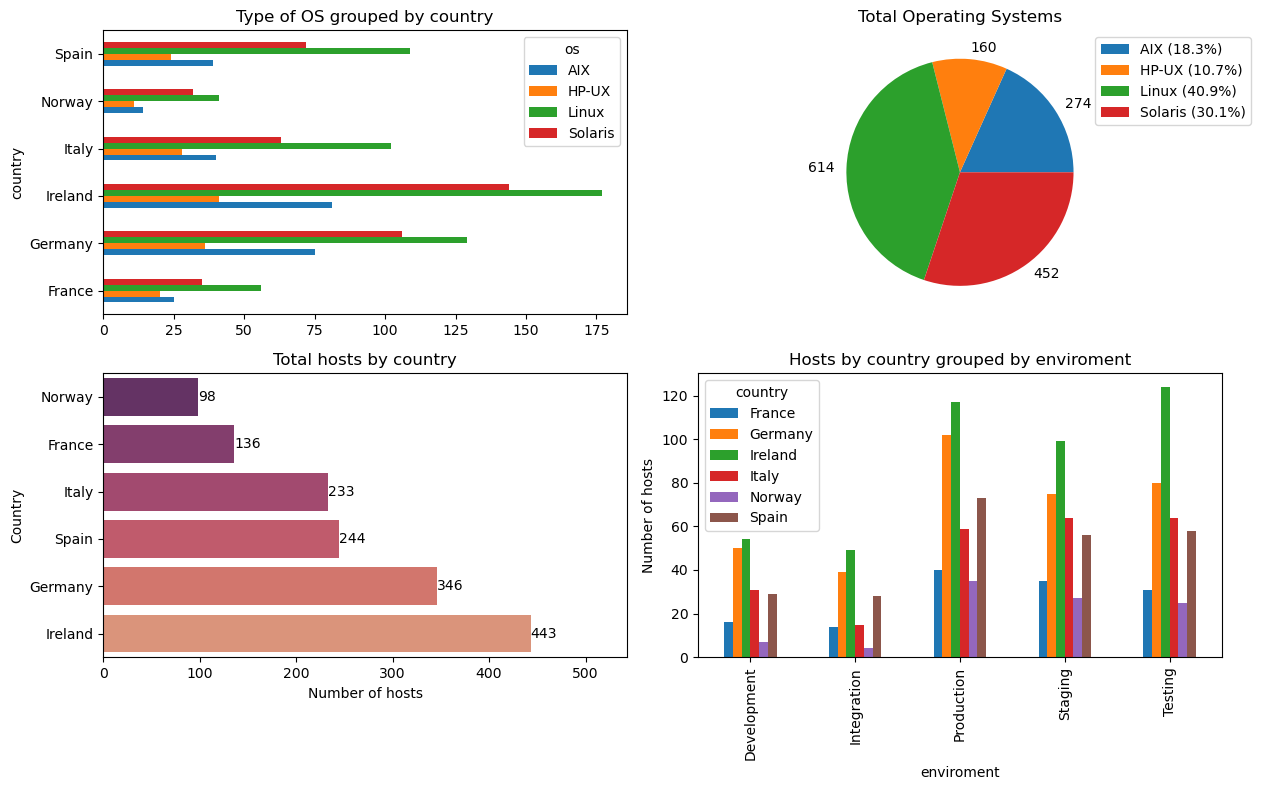

In [19]:
# We create graphs in a 2x2 layout:

fig, axs = plt.subplots(2, 2, figsize=(13, 8))

# GRAPH 1:

grafico_co_org.plot(kind='barh', ax=axs[0, 0])
axs[0, 0].set_title('Type of OS grouped by country')

# GRAPH 2:

axs[0, 1].pie(grafico_os_total, labels= grafico_os_total)
axs[0, 1].set_title('Total Operating Systems')
total = sum(grafico_os_total)
porcentajes = [(os_valor / total) * 100 for os_valor in grafico_os_total]
legend_labels = [f'{os} ({porcentaje:.1f}%)' for os, porcentaje in zip(grafico_os_total.index, porcentajes)]
axs[0, 1].legend(legend_labels, loc='upper right', bbox_to_anchor=(1.55, 1) )

# GRAPH 3:

sns.barplot(x=grafico_hc, y=grafico_hc.index, palette="flare",ax=axs[1, 0])
axs[1, 0].set_title('Total hosts by country')
axs[1, 0].set_xlabel('Number of hosts')
axs[1, 0].set_ylabel('Country')
axs[1, 0].invert_yaxis()
for index, valor in enumerate(grafico_hc):
        axs[1,0].annotate(str(valor), xy=(valor, index), va='center')
axs[1, 0].set_xlim(0,max(grafico_hc)+100)


# GRAPH 4:

grafico_hosts_ec.plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Hosts by country grouped by enviroment')
axs[1, 1].set_xlabel('enviroment')
axs[1, 1].set_ylabel('Number of hosts')


fig.tight_layout()
plt.show()